In [1]:
import pandas as pd  

# Load CSV files
patients = pd.read_csv("patients.csv")
providers = pd.read_csv("providers.csv")
claims = pd.read_csv("claims.csv")
prescriptions = pd.read_csv("prescriptions.csv")
analytics = pd.read_csv("analytics.csv")

# Display first 5 rows of each dataset
print("Patients Data:")
display(patients.head())

print("Providers Data:")
display(providers.head())

print("Claims Data:")
display(claims.head())

print("Prescriptions Data:")
display(prescriptions.head())

print("Analytics Data:")
display(analytics.head())


Patients Data:


,Patient_ID,First_Name,Last_Name,DOB,Gender,State,Insurance_Type,Chronic_Condition,Last_Visit_Date
0,P0001,Alex,Brown,1982-06-13,Male,IL,Medicaid,Asthma,2023-01-31
1,P0002,Emily,Johnson,1999-03-30,Male,FL,Private,Diabetes,2023-09-16
2,P0003,John,Doe,1978-04-16,Female,FL,Medicare,Heart Disease,2023-01-08
3,P0004,John,Patel,1953-01-10,Female,CA,Medicaid,NaN,2023-10-27
4,P0005,John,Smith,1981-11-09,Female,NY,Medicaid,Hypertension,2024-01-30


Providers Data:


,Provider_ID,Name,Specialty,State,Hospital_Affiliation,Years_Experience,Accepts_Medicare,Accepts_Medicaid
0,PR0001,Dr. David Lee,Endocrinologist,IL,Cleveland Clinic,23,Yes,No
1,PR0002,Dr. Raj Patel,General Physician,FL,Stanford Medical,12,No,Yes
2,PR0003,Dr. Susan Clark,General Physician,FL,Baylor Medical,22,No,No
3,PR0004,Dr. Lisa Chen,Endocrinologist,NY,Stanford Medical,15,Yes,No
4,PR0005,Dr. Raj Patel,Neurologist,TX,Baylor Medical,11,Yes,No


Claims Data:


,Claim_ID,Patient_ID,Provider_ID,Date_of_Service,Procedure_Code,Diagnosis,Claim_Amount,Status
0,C0001,P0043,PR0832,2023-01-08,99214,Hypertension,879.81,Pending
1,C0002,P0475,PR0867,2023-06-20,70551,Diabetes,461.34,Pending
2,C0003,P0626,PR0598,2023-03-11,99214,Hypertension,852.52,Denied
3,C0004,P0639,PR0560,2023-12-12,36415,Migraine,624.01,Denied
4,C0005,P0628,PR0286,2023-08-15,85025,Migraine,998.83,Pending


Prescriptions Data:


,Prescription_ID,Patient_ID,Provider_ID,Drug_Name,Dosage,Quantity,Date_Issued
0,RX0001,P0461,PR0466,Atorvastatin,20mg,87,2023-02-28
1,RX0002,P0474,PR0345,Metformin,10mg,30,2023-04-02
2,RX0003,P0411,PR0963,Aspirin,10mg,70,2023-05-26
3,RX0004,P0220,PR0893,Sumatriptan,100mg,27,2023-01-08
4,RX0005,P0688,PR0670,Metformin,500mg,20,2023-03-12


Analytics Data:


,Report_ID,Metric_Name,Value,Year,State,Risk_Level
0,R0001,Avg Claim Amount,28.34,2024,FL,High
1,R0002,Diabetes Prevalence (%),31.17,2024,IL,Medium
2,R0003,Readmission Rate (%),29.08,2023,TX,Medium
3,R0004,Readmission Rate (%),30.82,2024,CA,High
4,R0005,Avg Prescription Cost,11.55,2023,TX,Medium


In [2]:
# Check missing values in each dataset
print("Missing Values in Each Dataset:")
print("Patients:\n", patients.isnull().sum())
print("Providers:\n", providers.isnull().sum())
print("Claims:\n", claims.isnull().sum())
print("Prescriptions:\n", prescriptions.isnull().sum())
print("Analytics:\n", analytics.isnull().sum())


Missing Values in Each Dataset:
Patients:
 Patient_ID             0
First_Name             0
Last_Name              0
DOB                    0
Gender                 0
State                  0
Insurance_Type         0
Chronic_Condition    192
Last_Visit_Date        0
dtype: int64
Providers:
 Provider_ID             0
Name                    0
Specialty               0
State                   0
Hospital_Affiliation    0
Years_Experience        0
Accepts_Medicare        0
Accepts_Medicaid        0
dtype: int64
Claims:
 Claim_ID           0
Patient_ID         0
Provider_ID        0
Date_of_Service    0
Procedure_Code     0
Diagnosis          0
Claim_Amount       0
Status             0
dtype: int64
Prescriptions:
 Prescription_ID    0
Patient_ID         0
Provider_ID        0
Drug_Name          0
Dosage             0
Quantity           0
Date_Issued        0
dtype: int64
Analytics:
 Report_ID      0
Metric_Name    0
Value          0
Year           0
State          0
Risk_Level     0
dtype:

In [4]:
# Proper way to fill missing values in Pandas 3.0+
patients.loc[:, "Chronic_Condition"] = patients["Chronic_Condition"].fillna("Unknown")

# Verify if missing values are handled
print("Missing values after filling:")
print(patients.isnull().sum())


Missing values after filling:
Patient_ID           0
First_Name           0
Last_Name            0
DOB                  0
Gender               0
State                0
Insurance_Type       0
Chronic_Condition    0
Last_Visit_Date      0
dtype: int64


In [5]:
# Filter out denied claims
denied_claims = claims[claims["Status"] == "Denied"]

# Display first few rows of denied claims
print(f"Total Denied Claims: {denied_claims.shape[0]}")
display(denied_claims.head())


Total Denied Claims: 329


,Claim_ID,Patient_ID,Provider_ID,Date_of_Service,Procedure_Code,Diagnosis,Claim_Amount,Status
2,C0003,P0626,PR0598,2023-03-11,99214,Hypertension,852.52,Denied
3,C0004,P0639,PR0560,2023-12-12,36415,Migraine,624.01,Denied
5,C0006,P0439,PR0316,2023-03-10,80053,Migraine,318.61,Denied
10,C0011,P0366,PR0847,2023-07-19,85025,Anemia,756.77,Denied
11,C0012,P0571,PR0511,2023-11-28,85025,Anemia,634.85,Denied


In [6]:
# Find most common diagnoses in denied claims
top_diagnoses = denied_claims["Diagnosis"].value_counts().head(10)
print("Top 10 Diagnoses for Denied Claims:")
print(top_diagnoses)


Top 10 Diagnoses for Denied Claims:
Diagnosis
Diabetes           77
Migraine           75
Routine Checkup    67
Hypertension       56
Anemia             54
Name: count, dtype: int64


In [7]:
# Find most common procedure codes in denied claims
top_procedures = denied_claims["Procedure_Code"].value_counts().head(10)
print("\nTop 10 Procedure Codes for Denied Claims:")
print(top_procedures)



Top 10 Procedure Codes for Denied Claims:
Procedure_Code
36415    74
70551    68
85025    68
80053    66
99214    53
Name: count, dtype: int64


In [8]:
# Merge denied claims with patient details
denied_with_patients = denied_claims.merge(patients, on="Patient_ID")

# Find the insurance types with the highest denial rates
insurance_denials = denied_with_patients["Insurance_Type"].value_counts()
print("\nDenied Claims by Insurance Type:")
print(insurance_denials)



Denied Claims by Insurance Type:
Insurance_Type
Private      102
Medicare      82
Medicaid      78
Uninsured     67
Name: count, dtype: int64


In [9]:
# Merge denied claims with provider details
denied_with_providers = denied_claims.merge(providers, on="Provider_ID")

# Find the top providers with most denied claims
top_providers = denied_with_providers["Name"].value_counts().head(10)
print("\nTop 10 Providers with Most Denied Claims:")
print(top_providers)

# Find top hospitals with highest denial rates
top_hospitals = denied_with_providers["Hospital_Affiliation"].value_counts().head(10)
print("\nTop 10 Hospitals with Most Denied Claims:")
print(top_hospitals)



Top 10 Providers with Most Denied Claims:
Name
Dr. Raj Patel        74
Dr. Emily Johnson    67
Dr. Susan Clark      67
Dr. Lisa Chen        64
Dr. David Lee        57
Name: count, dtype: int64

Top 10 Hospitals with Most Denied Claims:
Hospital_Affiliation
Mount Sinai         75
Cleveland Clinic    71
Mayo Clinic         63
Baylor Medical      60
Stanford Medical    60
Name: count, dtype: int64


In [10]:
!pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.0 MB 3.5 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 2.8 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.0 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.0 MB 1.9 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/8.0 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.0 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.0 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.0 MB 1.8 MB/s eta 0:00:03
   ---------------------- ----------------- 4.5/8.0 MB 1.9 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.0 MB 1.9 MB/s eta 0:00:02
   ----------------

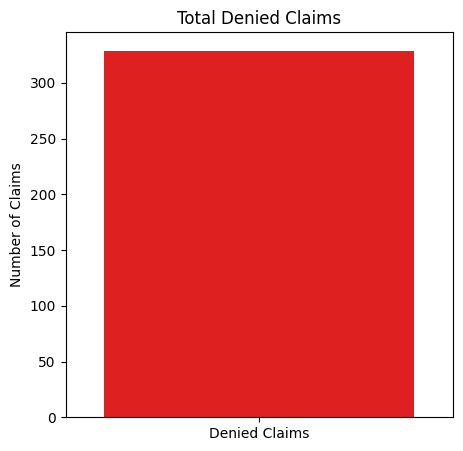

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of denied claims
denied_count = denied_claims.shape[0]

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(x=["Denied Claims"], y=[denied_count], color="red")
plt.ylabel("Number of Claims")
plt.title("Total Denied Claims")
plt.show()



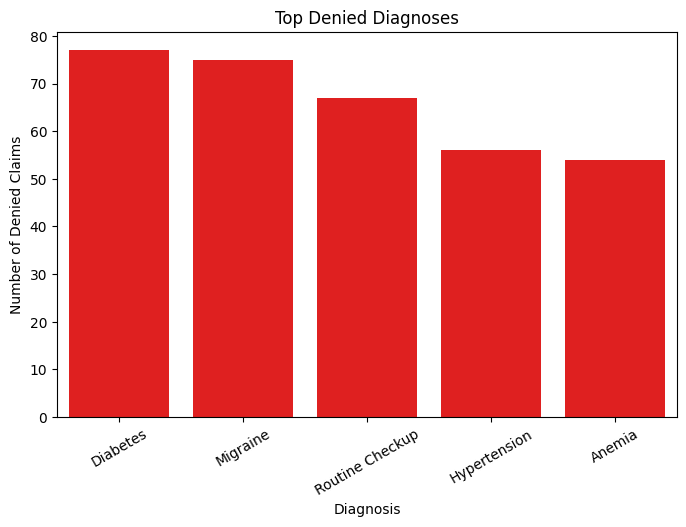

In [15]:
# Get top 5 diagnoses with most denials
top_diagnoses = denied_claims["Diagnosis"].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_diagnoses.index, y=top_diagnoses.values, color="red")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Denied Claims")
plt.title("Top Denied Diagnoses")
plt.xticks(rotation=30)
plt.show()



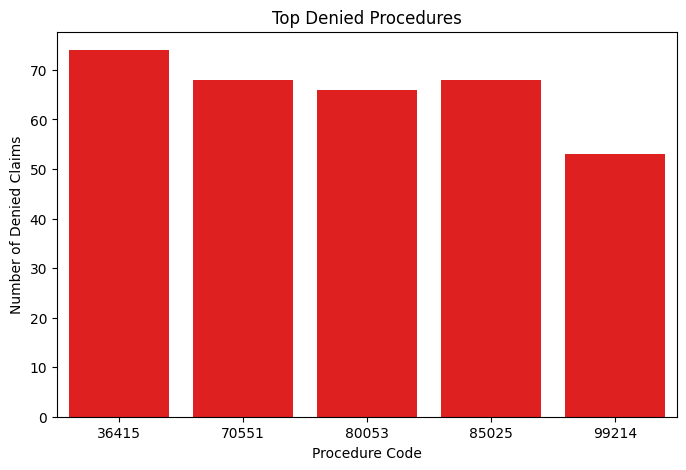

In [16]:
# Get top 5 procedures with most denials
top_procedures = denied_claims["Procedure_Code"].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_procedures.index, y=top_procedures.values, color="red")
plt.xlabel("Procedure Code")
plt.ylabel("Number of Denied Claims")
plt.title("Top Denied Procedures")
plt.show()


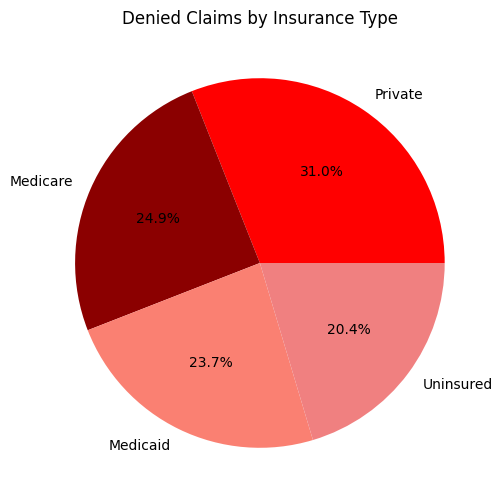

In [17]:
# Get denied claims by insurance type
insurance_denials = denied_with_patients["Insurance_Type"].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(insurance_denials, labels=insurance_denials.index, autopct="%1.1f%%", colors=["red", "darkred", "salmon", "lightcoral"])
plt.title("Denied Claims by Insurance Type")
plt.show()


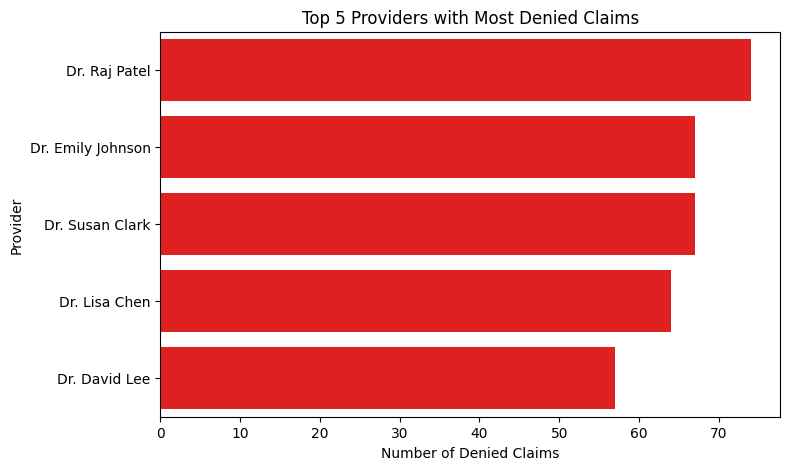

In [18]:
# Get top 5 providers with most denied claims
top_providers = denied_with_providers["Name"].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(y=top_providers.index, x=top_providers.values, color="red")
plt.xlabel("Number of Denied Claims")
plt.ylabel("Provider")
plt.title("Top 5 Providers with Most Denied Claims")
plt.show()
